# I. Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Đường dẫn đến file Excel
file_path = r"E:\SkyRevenue Insights\0. Data\df_cleaned.xlsx"

# Kiểm tra file có tồn tại không
import os
if os.path.exists(file_path):
    print("File tồn tại!")
else:
    print("File không tồn tại, kiểm tra lại đường dẫn!")
    raise FileNotFoundError("File không tồn tại!")

# Đọc sheet "Data"
df_org = pd.read_excel(file_path)
df = df_org.copy()
# Hiển thị vài dòng đầu của DataFrame để kiểm tra
df.head()

File tồn tại!


,order_id,ticket_id,passenger_id,passenger_gender,passenger_age,ticket_source_name,ticket_status,created_date,departure_date,departure_time,...,seat_class,ticket_price,baggage,insurance_fee,discount_amount,seat_category,age_group,lead_time_days,from,to
0,20205,31268,Xs1fLinPQun+Oy/mD0FlfXMyJD38YlXJfXNbz+qO+5U=,Female,40,IOS,Paid,2023-03-01,2023-03-14,17:55:00,...,I1_ECO,867760,0,0,45000,Economy,Adults (35-59),13,Đắk Lắk,Hồ Chí Minh
1,20190,31242,m/auVlEoaGSe2MqR/Lq4CFXJnI8zauNyF/KiFmMgXHs=,Female,40,GYL,Paid,2023-03-01,2023-03-02,09:30:00,...,Z1_ECO,974280,0,0,45000,Economy,Adults (35-59),1,Đắk Lắk,Hồ Chí Minh
2,20245,31337,6HvtV2vTqUfNBJ53C4TzvJnb0s74KgcRNuUVS+8jRvU=,Female,48,IOS,Paid,2023-03-01,2023-04-10,13:10:00,...,J1_ECO,1423080,0,0,16000,Economy,Adults (35-59),40,Thừa Thiên Huế,Hồ Chí Minh
3,20259,31360,WiK2P31WEd4mckRNVWz0C2aKKRgSrauAG8NdfTLnKjE=,Male,29,Android,New,2023-03-01,2023-04-10,13:10:00,...,J1_ECO,1067310,0,0,45000,Economy,Young Adults (18-34),40,Thừa Thiên Huế,Hồ Chí Minh
4,20255,31355,6HvtV2vTqUfNBJ53C4TzvJnb0s74KgcRNuUVS+8jRvU=,Female,42,IOS,Paid,2023-03-01,2023-04-10,13:10:00,...,J1_ECO,1067310,0,0,24000,Economy,Adults (35-59),40,Thừa Thiên Huế,Hồ Chí Minh


# II. Analysis

           Metric       Amount
0   Gross Revenue  19853050680
1  Total Discount   -462410000
2     Net Revenue  19390640680


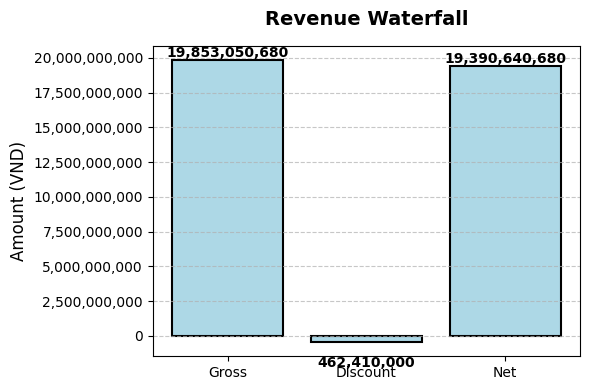

In [4]:
# -------- 1. Summary Waterfall (Gross – Discount = Net) --------
gross_rev = df['ticket_price'].sum()
total_discount = df['discount_amount'].sum()
net_rev = gross_rev - total_discount

summary_df = pd.DataFrame({
    'Metric': ['Gross Revenue', 'Total Discount', 'Net Revenue'],
    'Amount': [gross_rev, -total_discount, net_rev]
})

print(summary_df)

# Waterfall Revenue Chart (Correct color)
fig1, ax1 = plt.subplots(figsize=(6, 4))

bars = ax1.bar(
    ['Gross', 'Discount', 'Net'],
    [gross_rev, -total_discount, net_rev],
    color='lightblue',     # Màu nền light blue
    edgecolor='black',     # Viền đen rõ ràng
    linewidth=1.5          # Viền dày chút cho nổi bật
)

# Title & Label
ax1.set_title("Revenue Waterfall", fontsize=14, fontweight='bold', pad=15)
ax1.set_ylabel("Amount (VND)", fontsize=12)

# Format Y-axis with comma separator
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add grid
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        height if height > 0 else height - (gross_rev * 0.05),  # nếu là Discount thì để text thấp hơn 1 chút
        f'{int(abs(height)):,}',
        ha='center',
        va='bottom' if height > 0 else 'top',
        fontsize=10,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()


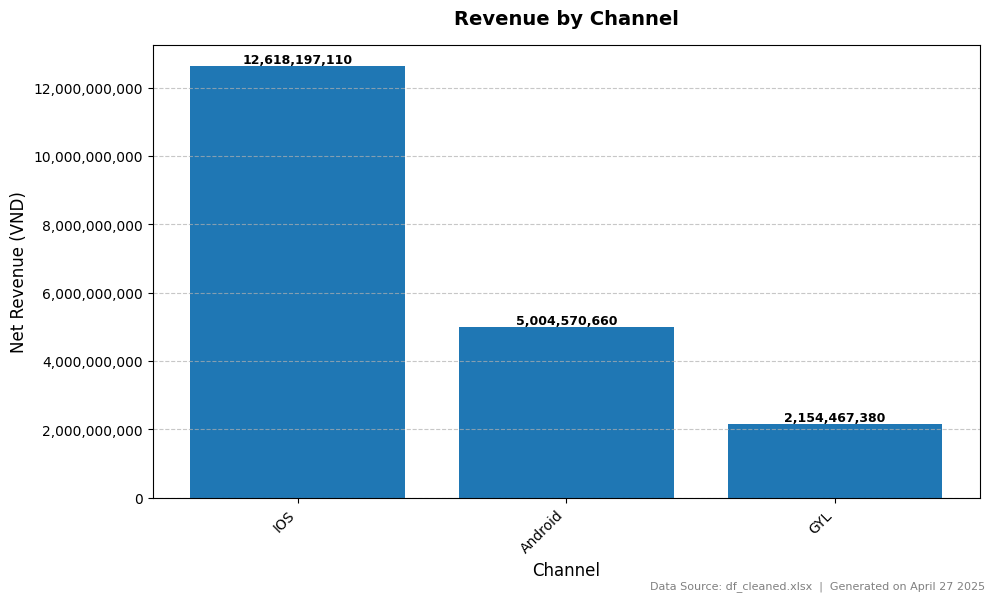

In [5]:
df['net_revenue'] = df['ticket_price'] - df['discount_amount'] + df['insurance_fee'] + df['baggage']

# ------------------------------------------------------------------
# 2. REVENUE BY CHANNEL  (BAR CHART)
# ------------------------------------------------------------------
channel_rev = (
    df.groupby("ticket_source_name", as_index=False)["net_revenue"]
      .sum()
      .sort_values("net_revenue", ascending=False)
)

fig1, ax1 = plt.subplots(figsize=(10, 6))

bars = ax1.bar(channel_rev["ticket_source_name"], channel_rev["net_revenue"])

# Data labels on each bar
for bar in bars:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height):,}",
        ha="center", va="bottom", fontsize=9, fontweight="bold"
    )

ax1.set_title("Revenue by Channel", fontsize=14, fontweight="bold", pad=15)
ax1.set_xlabel("Channel", fontsize=12)
ax1.set_ylabel("Net Revenue (VND)", fontsize=12)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.xticks(rotation=45, ha="right", fontsize=10)
ax1.grid(True, axis="y", linestyle="--", alpha=0.7)

plt.figtext(
    0.99, 0.01,
    "Data Source: df_cleaned.xlsx  |  Generated on April 27 2025",
    ha="right", fontsize=8, color="gray"
)
plt.tight_layout()
plt.show()


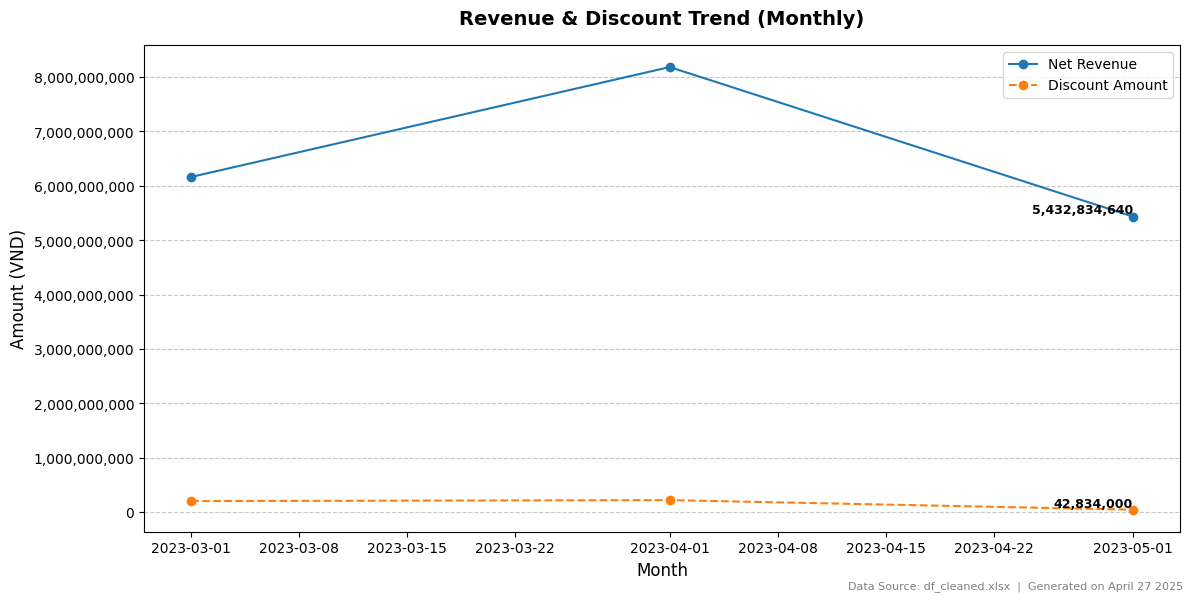

In [6]:
# ------------------------------------------------------------------
# 3. REVENUE & DISCOUNT TREND  (LINE CHART)
# ------------------------------------------------------------------
# Convert created_date to datetime if not already and aggregate monthly
df["created_date"] = pd.to_datetime(df["created_date"])
df["created_month"] = df["created_date"].dt.to_period("M").dt.to_timestamp()

monthly_metrics = (
    df.groupby("created_month")
      .agg(
          Net_Revenue=("net_revenue", "sum"),
          Total_Discount=("discount_amount", "sum")
      )
      .reset_index()
      .sort_values("created_month")
)

fig2, ax2 = plt.subplots(figsize=(12, 6))

ax2.plot(
    monthly_metrics["created_month"], monthly_metrics["Net_Revenue"],
    marker="o", label="Net Revenue"
)
ax2.plot(
    monthly_metrics["created_month"], monthly_metrics["Total_Discount"],
    marker="o", linestyle="--", label="Discount Amount"
)

# Annotate last point for quick insight
last_idx = monthly_metrics.index[-1]
ax2.text(
    monthly_metrics.loc[last_idx, "created_month"],
    monthly_metrics.loc[last_idx, "Net_Revenue"],
    f"{int(monthly_metrics.loc[last_idx, 'Net_Revenue']):,}",
    ha="right", va="bottom", fontsize=9, fontweight="bold"
)
ax2.text(
    monthly_metrics.loc[last_idx, "created_month"],
    monthly_metrics.loc[last_idx, "Total_Discount"],
    f"{int(monthly_metrics.loc[last_idx, 'Total_Discount']):,}",
    ha="right", va="bottom", fontsize=9, fontweight="bold"
)

ax2.set_title("Revenue & Discount Trend (Monthly)", fontsize=14, fontweight="bold", pad=15)
ax2.set_xlabel("Month", fontsize=12)
ax2.set_ylabel("Amount (VND)", fontsize=12)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))
ax2.grid(True, axis="y", linestyle="--", alpha=0.7)
ax2.legend()

plt.figtext(
    0.99, 0.01,
    "Data Source: df_cleaned.xlsx  |  Generated on April 27 2025",
    ha="right", fontsize=8, color="gray"
)
plt.tight_layout()
plt.show()

                    Gross_Revenue   Discount  Net_Revenue  Avg_Ticket_Price
ticket_source_name                                                         
IOS                   12663692010  299547000  12618197110         1030742.0
Android                5026971510  114410000   5004570660         1073680.0
GYL                    2162387160   48453000   2154467380         1077960.0


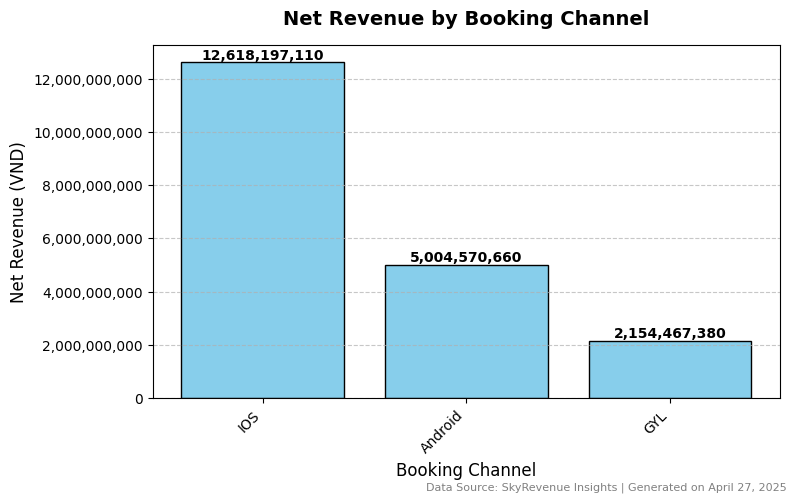

In [7]:
# -------- 2. Revenue by Channel --------
channel_rev = (
    df.groupby('ticket_source_name')
      .agg(
          Gross_Revenue=('ticket_price', 'sum'),
          Discount=('discount_amount', 'sum'),
          Net_Revenue=('net_revenue', 'sum'),
          Avg_Ticket_Price=('ticket_price', 'mean')
      )
      .sort_values('Net_Revenue', ascending=False)
      .round(0)
)

print(channel_rev)

# Create the bar chart
fig2, ax2 = plt.subplots(figsize=(8, 5))  # Slightly larger for clarity

# Plot the bars
bars = ax2.bar(channel_rev.index, channel_rev['Net_Revenue'], color='skyblue', edgecolor='black')

# Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax2.text(
        bar.get_x() + bar.get_width() / 2,  # Center the text horizontally
        height,  # Position at the top of the bar
        f'{int(height):,}',  # Format number with commas
        ha='center', va='bottom',  # Horizontal and vertical alignment
        fontsize=10, fontweight='bold'
    )

# Customize the chart
ax2.set_title('Net Revenue by Booking Channel', fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Booking Channel', fontsize=12)
ax2.set_ylabel('Net Revenue (VND)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add grid for better readability
ax2.grid(True, axis='y', linestyle='--', alpha=0.7)

# Format y-axis with commas for readability
ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Add a footer annotation for context
plt.figtext(
    0.99, 0.01, 
    'Data Source: SkyRevenue Insights | Generated on April 27, 2025',
    ha='right', fontsize=8, color='gray'
)

# Show the plot
plt.show()

                              Net_Revenue  Booking  Avg_Ticket_Price
from_to                                                             
Hồ Chí Minh - Hà Nội           2039332120     1551         1297604.0
Hà Nội - Hồ Chí Minh           1765463350     1377         1262795.0
Đà Nẵng - Hồ Chí Minh           923057610      831         1104849.0
Hồ Chí Minh - Đà Nẵng           876249080      859         1020992.0
Hồ Chí Minh - Khánh Hòa         822791660     1008          826265.0
Khánh Hòa - Hồ Chí Minh         737598240      893          834473.0
Lâm Đồng - Hồ Chí Minh          583286720      663          866982.0
Hồ Chí Minh - Đắk Lắk           466163160      591          809651.0
Hà Nội - Đà Nẵng                464151960      440         1063617.0
Hồ Chí Minh - Thừa Thiên Huế    461652110      420         1105444.0


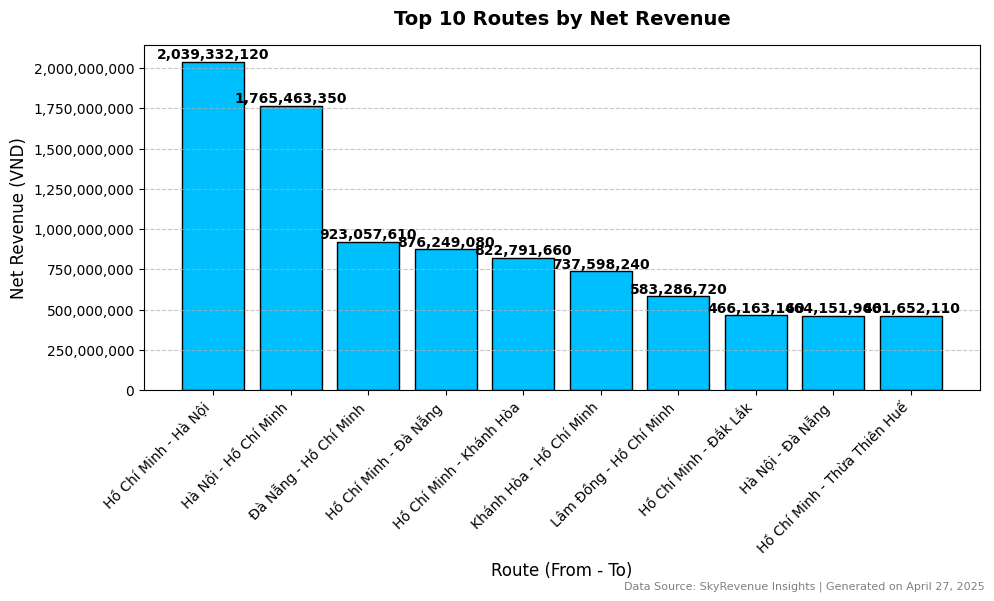

In [8]:
# -------- 3. Top 10 Routes by Net Revenue --------
# Top 10 Routes by Net Revenue
route_rev = (
    df.groupby('from_to')
      .agg(
          Net_Revenue=('net_revenue', 'sum'),
          Booking=('ticket_id', 'count'),
          Avg_Ticket_Price=('ticket_price', 'mean')
      )
      .sort_values('Net_Revenue', ascending=False)
      .head(10)
      .round(0)
)

print(route_rev)

# Create bar chart for Top 10 Routes
fig3, ax3 = plt.subplots(figsize=(10, 6))  # Larger size for more routes

bars3 = ax3.bar(
    route_rev.index,
    route_rev['Net_Revenue'],
    color='deepskyblue',  # màu xanh nổi bật
    edgecolor='black'
)

# Add data labels on top of each bar
for bar in bars3:
    height = bar.get_height()
    ax3.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height):,}',
        ha='center', va='bottom',
        fontsize=10, fontweight='bold'
    )

# Customize the chart
ax3.set_title('Top 10 Routes by Net Revenue', fontsize=14, fontweight='bold', pad=15)
ax3.set_xlabel('Route (From - To)', fontsize=12)
ax3.set_ylabel('Net Revenue (VND)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
ax3.grid(True, axis='y', linestyle='--', alpha=0.7)
ax3.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add footer annotation
plt.figtext(
    0.99, 0.01,
    'Data Source: SkyRevenue Insights | Generated on April 27, 2025',
    ha='right', fontsize=8, color='gray'
)

plt.tight_layout()
plt.show()


               Avg_Ticket_Price  Booking  Booking_Percentage
seat_category                                               
First Class           4220120.0        4                 0.0
Business              2880781.0       16                 0.1
Deluxe                1175530.0       41                 0.2
Economy               1043826.0    18913                99.7


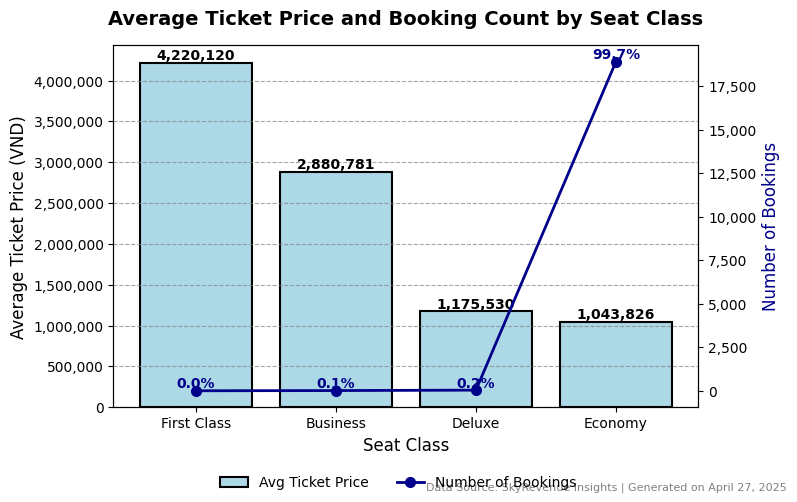

In [9]:
# Dữ liệu từ bảng
seat_rev = (
    df.groupby('seat_category')
      .agg(Avg_Ticket_Price=('ticket_price', 'mean'),
           Booking=('ticket_id', 'count'))
      .sort_values('Avg_Ticket_Price', ascending=False)
      .round(0)
)

# Tính phần trăm Booking
total_bookings = seat_rev['Booking'].sum()
seat_rev['Booking_Percentage'] = (seat_rev['Booking'] / total_bookings * 100).round(1)

print(seat_rev)

# Vẽ biểu đồ với màu mới
fig4, ax4 = plt.subplots(figsize=(8, 5))

# Bar chart: Average Ticket Price
bars4 = ax4.bar(
    seat_rev.index,
    seat_rev['Avg_Ticket_Price'],
    color='lightblue',        # Đổi từ lightgreen → lightblue
    edgecolor='black',        # Viền đen rõ
    linewidth=1.5,
    label='Avg Ticket Price'
)

# Thêm nhãn giá trị lên cột
for bar in bars4:
    height = bar.get_height()
    ax4.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height):,}',
        ha='center', va='bottom',
        fontsize=10, fontweight='bold'
    )

# Line chart: Number of Bookings
ax4_twin = ax4.twinx()
line = ax4_twin.plot(
    seat_rev.index,
    seat_rev['Booking'],
    color='darkblue',        # Line màu darkblue
    marker='o',
    markersize=7,
    linewidth=2,
    label='Number of Bookings'
)[0]

# Thêm nhãn % booking trên line
for i, (booking_count, percentage) in enumerate(zip(seat_rev['Booking'], seat_rev['Booking_Percentage'])):
    ax4_twin.text(
        i,
        booking_count,
        f'{percentage}%',
        ha='center', va='bottom',
        fontsize=10, fontweight='bold',
        color='darkblue'
    )

# Title & Labels
ax4.set_title('Average Ticket Price and Booking Count by Seat Class', fontsize=14, fontweight='bold', pad=15)
ax4.set_xlabel('Seat Class', fontsize=12)
ax4.set_ylabel('Average Ticket Price (VND)', fontsize=12, color='black')
ax4_twin.set_ylabel('Number of Bookings', fontsize=12, color='darkblue')

# Xoay nhãn x-axis
plt.xticks(rotation=45, ha='right', fontsize=10)

# Grids
ax4.grid(True, axis='y', linestyle='--', alpha=0.7, color='grey')
ax4_twin.grid(False)

# Định dạng số
ax4.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
ax4_twin.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Gom legend
lines_labels = [ax.get_legend_handles_labels() for ax in [ax4, ax4_twin]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig4.legend(lines, labels, loc='lower center', ncol=2, fontsize=10, frameon=False)

# Chỉnh layout để đủ chỗ
plt.tight_layout(rect=[0, 0.05, 1, 1])

# Footer chú thích
plt.figtext(
    0.99, 0.01,
    'Data Source: SkyRevenue Insights | Generated on April 27, 2025',
    ha='right', fontsize=8, color='gray'
)

# Show
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_27784\3566289497.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfr.groupby('price_bin')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_27784\3566289497.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfr.groupby('price_bin')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_27784\3566289497.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfr.groupby('price_bin')
C:\User

                     Route  Elasticity Elasticity_Type
0     Hồ Chí Minh - Hà Nội      -0.047       Inelastic
1     Hà Nội - Hồ Chí Minh      -0.055       Inelastic
2  Hồ Chí Minh - Khánh Hòa      -0.084       Inelastic
3  Khánh Hòa - Hồ Chí Minh      -0.110       Inelastic
4    Hồ Chí Minh - Đà Nẵng      -0.051       Inelastic


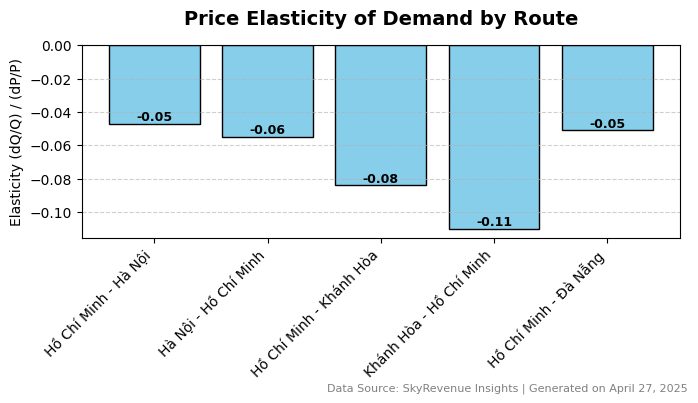

In [10]:

# ----------------------------
# PART 1 – Price Elasticity (Top 5 Routes)
# ----------------------------
top_routes = (
    df.groupby('from_to')['ticket_id']
      .count()
      .sort_values(ascending=False)
      .head(5)
      .index
)

elasticity_records = []

for route in top_routes:
    dfr = df[df['from_to'] == route].copy()
    dfr['price_bin'] = pd.qcut(dfr['ticket_price'], 5, duplicates='drop')
    agg = (
        dfr.groupby('price_bin')
          .agg(Booking=('ticket_id', 'count'),
               Avg_Price=('ticket_price', 'mean'))
          .reset_index()
    )
    agg['log_q'] = np.log(agg['Booking'])
    agg['log_p'] = np.log(agg['Avg_Price'])

    if len(agg) >= 3:
        slope, _ = np.polyfit(agg['log_p'], agg['log_q'], 1)
        elasticity_records.append({
            'Route': route,
            'Elasticity': round(slope, 3),
            'Elasticity_Type': 'Elastic' if abs(slope) > 1 else 'Inelastic'
        })

# Display Elasticity Summary
elasticity_df = pd.DataFrame(elasticity_records)
print(elasticity_df)

# Biểu đồ Elasticity
fig1, ax1 = plt.subplots(figsize=(7, 4))
bars1 = ax1.bar(elasticity_df['Route'], elasticity_df['Elasticity'], color='skyblue', edgecolor='black')

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

ax1.axhline(0, color='grey', linestyle='--', linewidth=0.8)
ax1.set_ylabel("Elasticity (dQ/Q) / (dP/P)")
ax1.set_title("Price Elasticity of Demand by Route", fontsize=14, fontweight='bold', pad=15)
ax1.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Footer
plt.figtext(
    0.99, 0.01,
    'Data Source: SkyRevenue Insights | Generated on April 27, 2025',
    ha='right', fontsize=8, color='gray'
)
plt.show()



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_27784\785691770.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('discount_band')


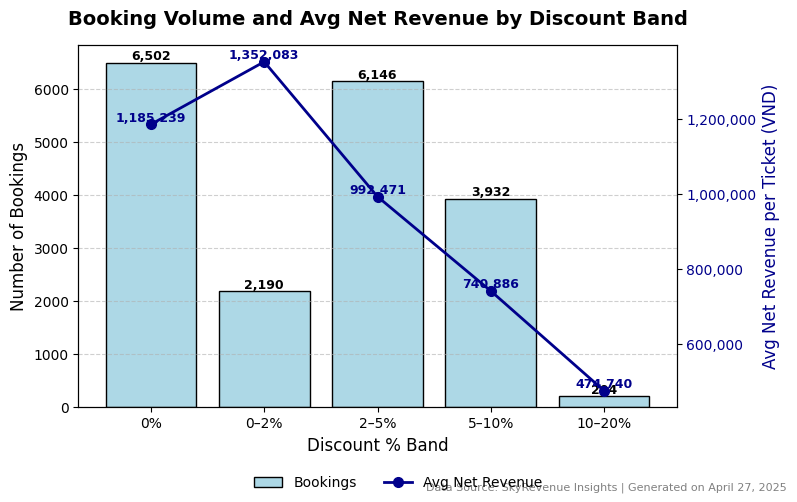

In [13]:
df['discount_pct'] = df['discount_amount'] / df['ticket_price'] * 100

# Bins of discount %
bins = [-0.1, 0, 2, 5, 10, 20, 100]
labels = ['0%', '0–2%', '2–5%', '5–10%', '10–20%', '>20%']
df['discount_band'] = pd.cut(df['discount_pct'], bins=bins, labels=labels)

disc_df = (
    df.groupby('discount_band')
      .agg(
          Bookings=('ticket_id', 'count'),
          Avg_Net_Rev=('net_revenue', 'mean'),
          Total_Net_Rev=('net_revenue', 'sum')
      )
      .dropna()
      .reset_index()
)

# Gộp Booking Volume và Avg Net Revenue vào 1 chart
fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar chart: Booking Volume
bars = ax1.bar(
    disc_df['discount_band'],
    disc_df['Bookings'],
    color='lightblue',       # màu light pastel
    edgecolor='black',
    label='Bookings'
)

# Ghi số lượng booking trên từng cột
for bar in bars:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height):,}',
        ha='center', va='bottom',
        fontsize=9, fontweight='bold'
    )

ax1.set_xlabel("Discount % Band", fontsize=12)
ax1.set_ylabel("Number of Bookings", fontsize=12, color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(True, axis='y', linestyle='--', alpha=0.6)

# Line chart: Avg Net Revenue (secondary axis)
ax2 = ax1.twinx()
line = ax2.plot(
    disc_df['discount_band'],
    disc_df['Avg_Net_Rev'],
    color='darkblue',
    marker='o',
    markersize=7,
    linewidth=2,
    label='Avg Net Revenue'
)[0]

# Ghi giá trị Avg Net Revenue trên từng điểm
for i, value in enumerate(disc_df['Avg_Net_Rev']):
    ax2.text(
        i,
        value,
        f'{int(value):,}',
        ha='center', va='bottom',
        fontsize=9, fontweight='bold',
        color='darkblue'
    )

ax2.set_ylabel("Avg Net Revenue per Ticket (VND)", fontsize=12, color='darkblue')
ax2.tick_params(axis='y', labelcolor='darkblue')
ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Title & Layout
plt.title("Booking Volume and Avg Net Revenue by Discount Band", fontsize=14, fontweight='bold', pad=15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout(rect=[0, 0.05, 1, 1])

# Gom Legend
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='lower center', ncol=2, fontsize=10, frameon=False)

# Footer
plt.figtext(
    0.99, 0.01,
    'Data Source: SkyRevenue Insights | Generated on April 27, 2025',
    ha='right', fontsize=8, color='gray'
)

# Hiển thị
plt.show()


# III. Ancillary Sales Detail and Operation 

Ancillary Sales Summary                           Value
Total Bookings         18974.00
Baggage Uptake %           9.47
Insurance Uptake %         0.21
Ancillary Rev per Pax  73609.00
Attach-rate Funnel             Stage  Count
0  Total Bookings  18974
1       + Baggage   1796
2     + Insurance     39
3          + Both      4


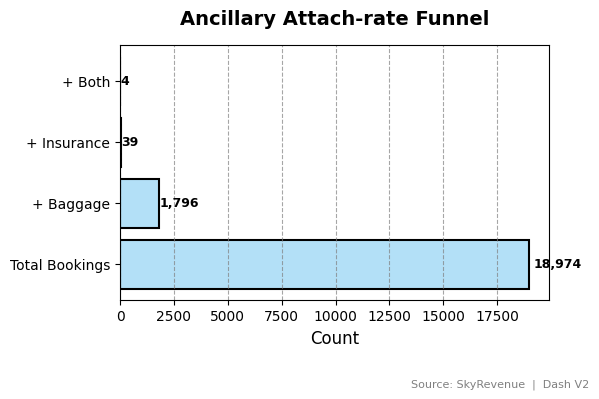

Status Funnel                Count   Pct
ticket_status             
New            10340  54.5
Paid            8475  44.7
Cancel           159   0.8


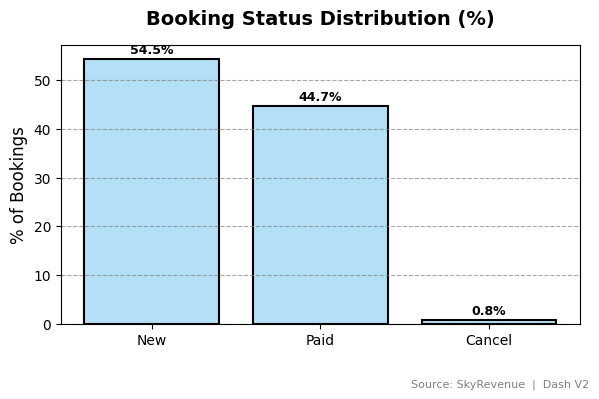

Refund Processing Metrics                              Value
Metric                            
Avg Refund Lead-time (days)    2.5
SLA Compliance (%)            90.0


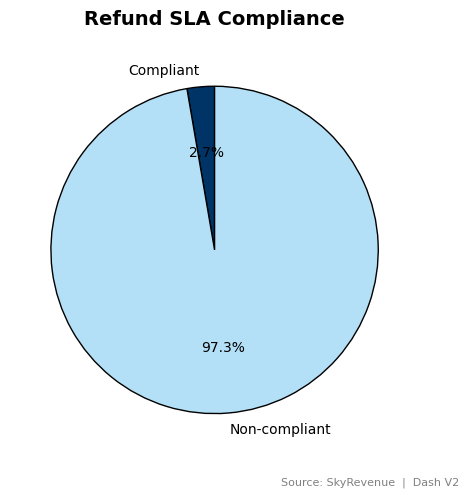

In [14]:
# Style
BAR_COLOR   = "#b3e0f7"
EDGE_COLOR  = "black"
LINE_COLOR  = "#003366"
GRID_COLOR  = "grey"
FOOTER      = "Source: SkyRevenue  |  Dash V2"
FONT_SMALL  = 9

# ─────────── 6. ANCILLARY SALES DETAIL ───────────
df["baggage_flag"]   = df["baggage"] > 0
df["insurance_flag"] = df["insurance_fee"] > 0

anc = {
    "Total Bookings": df["ticket_id"].count(),
    "Baggage Uptake %": df["baggage_flag"].mean()*100,
    "Insurance Uptake %": df["insurance_flag"].mean()*100,
    "Ancillary Rev per Pax": (df["baggage"] + df["insurance_fee"]).sum() / df["passenger_id"].nunique()
}
anc_df = pd.DataFrame.from_dict(anc, orient="index", columns=["Value"]).round(2)
print("Ancillary Sales Summary", anc_df)

# Attach-rate funnel data
funnel = [
    ("Total Bookings", anc["Total Bookings"]),
    ("+ Baggage", df["baggage_flag"].sum()),
    ("+ Insurance", df["insurance_flag"].sum()),
    ("+ Both", df[df["baggage_flag"] & df["insurance_flag"]]["ticket_id"].count())
]
funnel_df = pd.DataFrame(funnel, columns=["Stage", "Count"])
print("Attach-rate Funnel", funnel_df)

# Funnel chart (horizontal bar)
fig, ax = plt.subplots(figsize=(6,4))
stages = funnel_df["Stage"]
counts = funnel_df["Count"]
bars = ax.barh(
    stages, counts,
    color=BAR_COLOR, edgecolor=EDGE_COLOR, linewidth=1.5
)
for bar in bars:
    ax.text(
        bar.get_width()+bar.get_width()*0.01,
        bar.get_y()+bar.get_height()/2,
        f"{int(bar.get_width()):,}",
        va="center", fontsize=FONT_SMALL, fontweight="bold"
    )
ax.set_title("Ancillary Attach-rate Funnel", fontsize=14, fontweight="bold", pad=15)
ax.set_xlabel("Count", fontsize=12)
ax.grid(True, axis="x", linestyle="--", alpha=0.7, color=GRID_COLOR)
plt.tight_layout(rect=[0,0.08,1,1])
plt.figtext(0.99,0.02,FOOTER,ha="right",fontsize=8,color="gray")
plt.show()

# ─────────── 7. OPERATIONAL METRICS DETAIL ───────────
# Status funnel
status_counts = df["ticket_status"].value_counts()
status_df = status_counts.to_frame("Count")
status_df["Pct"] = (status_df["Count"] / status_df["Count"].sum()*100).round(1)
print("Status Funnel", status_df)

# Bar chart – status distribution
fig, ax = plt.subplots(figsize=(6,4))
bars = ax.bar(
    status_df.index, status_df["Pct"],
    color=BAR_COLOR, edgecolor=EDGE_COLOR, linewidth=1.5
)
for bar in bars:
    ax.text(
        bar.get_x()+bar.get_width()/2,
        bar.get_height()+0.5,
        f"{bar.get_height():.1f}%",
        ha="center", va="bottom",
        fontsize=FONT_SMALL, fontweight="bold"
    )
ax.set_title("Booking Status Distribution (%)", fontsize=14, fontweight="bold", pad=15)
ax.set_ylabel("% of Bookings", fontsize=12)
ax.grid(True, axis="y", linestyle="--", alpha=0.7, color=GRID_COLOR)
plt.tight_layout(rect=[0,0.08,1,1])
plt.figtext(0.99,0.02,FOOTER,ha="right",fontsize=8,color="gray")
plt.show()

# Simulated refund metrics
refund_stats = pd.DataFrame({
    "Metric": ["Avg Refund Lead-time (days)", "SLA Compliance (%)"],
    "Value": [2.5, 90]
})
print("Refund Processing Metrics", refund_stats.set_index("Metric"))

# Pie chart – SLA compliance
plt.figure(figsize=(5,5))
vals = refund_stats["Value"].tolist()
labels = [f"{refund_stats.loc[1,'Value']:.0f}%", ""]  # chỉ hiển thị % compliant
plt.pie(
    vals,
    labels=[ "Compliant", "Non-compliant" ],
    autopct=lambda pct: f"{pct:.1f}%",
    startangle=90,
    colors=[LINE_COLOR, BAR_COLOR],
    wedgeprops=dict(edgecolor=EDGE_COLOR)
)
plt.title("Refund SLA Compliance", fontsize=14, fontweight="bold", pad=15)
plt.tight_layout(rect=[0,0.05,1,1])
plt.figtext(0.99,0.02,FOOTER,ha="right",fontsize=8,color="gray")
plt.show()

Ancillary Uptake Rates by Seat Category (%) - Ordered
               Baggage  Insurance  Both
seat_category                          
Economy            9.5        0.2   0.0
Deluxe             7.3        0.0   0.0
Business           0.0        0.0   0.0
First Class       25.0        0.0   0.0


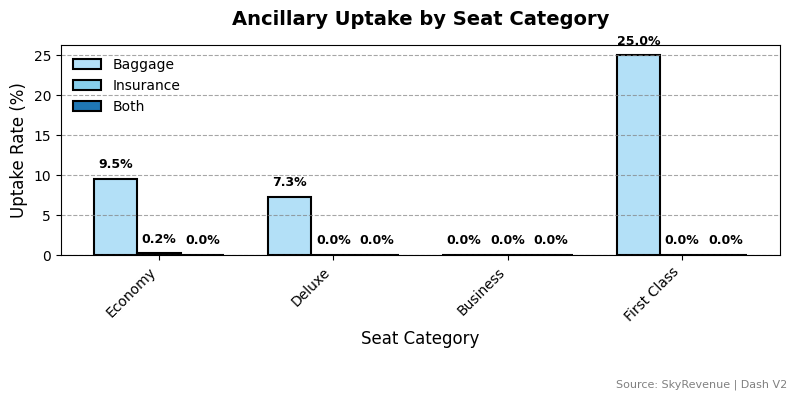

In [21]:
# Xác định thứ tự đúng dựa trên dữ liệu
order = [c for c in ["Economy", "Deluxe", "Business", "First Class"] if c in seat["seat_category"].unique()]

# Sắp xếp lại
seat_ordered = seat.set_index("seat_category").reindex(order).reset_index()

# In bảng đã sắp xếp
uptake_table_ord = seat_ordered.set_index("seat_category")[["Baggage", "Insurance", "Both"]]
print("Ancillary Uptake Rates by Seat Category (%) - Ordered")
print(uptake_table_ord.to_string())

# Vẽ bar chart
categories = seat_ordered["seat_category"]
x = np.arange(len(categories))
width = 0.25

fig, ax = plt.subplots(figsize=(8, 4))
bars1 = ax.bar(x - width, seat_ordered["Baggage"], width, color="#b3e0f7", edgecolor="black", linewidth=1.5, label="Baggage")
bars2 = ax.bar(x, seat_ordered["Insurance"], width, color="#87ceeb", edgecolor="black", linewidth=1.5, label="Insurance")
bars3 = ax.bar(x + width, seat_ordered["Both"], width, color="#1f77b4", edgecolor="black", linewidth=1.5, label="Both")

for bars in (bars1, bars2, bars3):
    for bar in bars:
        h = bar.get_height()
        ax.text(bar.get_x()+bar.get_width()/2, h+1, f"{h:.1f}%", ha="center", va="bottom", fontsize=9, fontweight="bold")

ax.set_title("Ancillary Uptake by Seat Category", fontsize=14, fontweight="bold", pad=15)
ax.set_xlabel("Seat Category", fontsize=12)
ax.set_ylabel("Uptake Rate (%)", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha="right")
ax.grid(True, axis="y", linestyle="--", alpha=0.7, color="grey")
ax.legend(frameon=False)

plt.tight_layout(rect=[0,0.08,1,1])
plt.figtext(0.99,0.02,"Source: SkyRevenue | Dash V2", ha="right", fontsize=8, color="gray")
plt.show()
